In [ ]:
##

# # 1. Use the use case in the class:
a. Add more Dense layers to the existing code and check how the accuracy changes.

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation  

path_to_csv = 'diabetes.csv'  
dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:, 0:8], dataset[:, 8],
                                                    test_size=0.25, random_state=87)

np.random.seed(155)
my_nn = Sequential()

my_nn.add(Dense(20, input_dim=8, activation='relu'))  
my_nn.add(Dense(10, activation='relu'))  
my_nn.add(Dense(5, activation='relu'))  
my_nn.add(Dense(1, activation='sigmoid'))  

my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

my_nn_fitted = my_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

print(my_nn.summary())

evaluation = my_nn.evaluate(X_test, Y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Epoch 1/100
18/18 [==============================] - 0s 465us/step - loss: 10.0752 - accuracy: 0.6615
Epoch 2/100
18/18 [==============================] - 0s 365us/step - loss: 3.1853 - accuracy: 0.6632
Epoch 3/100
18/18 [==============================] - 0s 410us/step - loss: 1.0992 - accuracy: 0.5347
Epoch 4/100
18/18 [==============================] - 0s 376us/step - loss: 0.8202 - accuracy: 0.6597
Epoch 5/100
18/18 [==============================] - 0s 403us/step - loss: 0.6850 - accuracy: 0.6771
Epoch 6/100
18/18 [==============================] - 0s 351us/step - loss: 0.6423 - accuracy: 0.6806
Epoch 7/100
18/18 [==============================] - 0s 342us/step - loss: 0.6285 - accuracy: 0.6840
Epoch 8/100
18/18 [==============================] - 0s 394us/step - loss: 0.6247 - accuracy: 0.6788
Epoch 9/100
18/18 [==============================] - 0s 329us/step - loss: 0.6218 - accuracy: 0.6840
Epoch 10/100
18/18 [==============================] - 0s 382us/step - loss: 0.6205 - accur

# # 2. Change the data source to Breast Cancer dataset * available in the source code folder and make required
changes. Report accuracy of the model.

In [12]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

path_to_csv = 'breast_cancer.csv'
dataset = pd.read_csv(path_to_csv)

X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=87)

np.random.seed(155)
my_nn = Sequential()

my_nn.add(Dense(20, input_dim=X.shape[1], activation='relu'))  
my_nn.add(Dense(10, activation='relu'))  
my_nn.add(Dense(5, activation='relu'))  
my_nn.add(Dense(1, activation='sigmoid'))  


my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


my_nn_fitted = my_nn.fit(X_train, y_train, epochs=100, initial_epoch=0, verbose=0)


evaluation = my_nn.evaluate(X_test, y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


5/5 [==============================] - 0s 543us/step - loss: nan - accuracy: 0.6503
Test Loss: nan
Test Accuracy: 0.6503496766090393


# # Normalize the data before feeding the data to the model and check how the normalization change your
accuracy (code given below).
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

path_to_csv = 'breast_cancer.csv'
dataset = pd.read_csv(path_to_csv)

dataset.fillna(dataset.mean(), inplace=True)

zero_variance_features = dataset.columns[dataset.var() == 0]
dataset.drop(zero_variance_features, axis=1, inplace=True)

X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=87)

np.random.seed(155)
my_nn = Sequential()

my_nn.add(Dense(20, input_dim=X_normalized.shape[1], activation='relu'))  
my_nn.add(Dense(10, activation='relu'))  
my_nn.add(Dense(5, activation='relu'))  
my_nn.add(Dense(1, activation='sigmoid'))  

my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

my_nn_fitted = my_nn.fit(X_train, y_train, epochs=100, initial_epoch=0, verbose=0)

evaluation = my_nn.evaluate(X_test, y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 1s 491us/step - loss: 0.2518 - accuracy: 0.9277 - val_loss: 0.1273 - val_accuracy: 0.9636
Epoch 2/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.1104 - accuracy: 0.9679 - val_loss: 0.0896 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 1s 461us/step - loss: 0.0778 - accuracy: 0.9763 - val_loss: 0.0855 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 1s 460us/step - loss: 0.0582 - accuracy: 0.9820 - val_loss: 0.0855 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 1s 463us/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.0352 - accuracy: 0.9888 - val_loss: 0.0775 - val_accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 1s 

# Plot the loss and accuracy for both training data and validation data using the history object in the source
code.

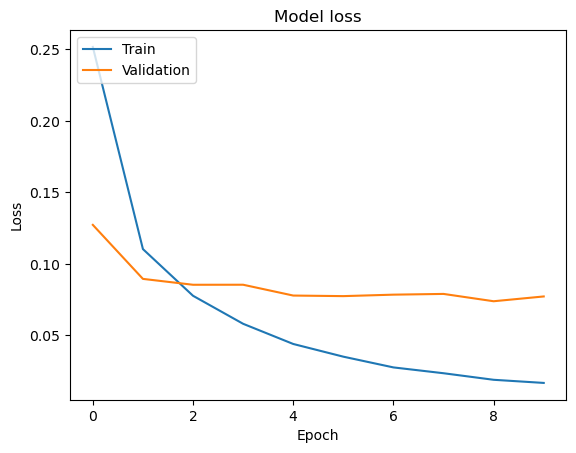

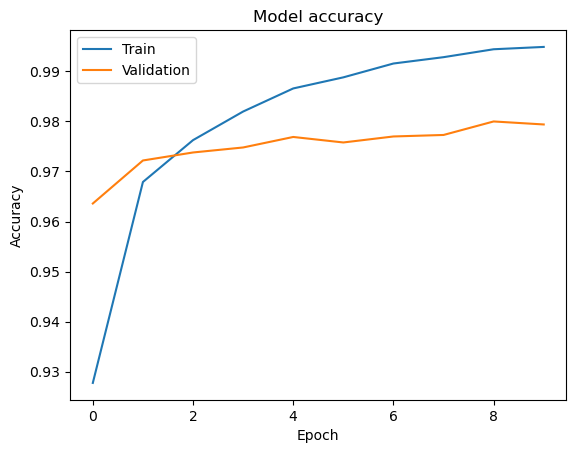

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## ## Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
on that single image.

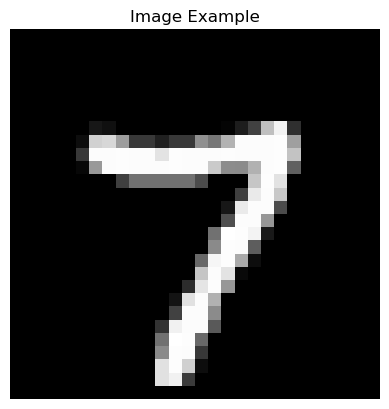

1/1 [==============================] - 0s 17ms/step
Predicted class: 7


In [24]:
import random

random_index = random.randint(0, len(X_test) - 1)
image = X_test[random_index]

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('Image Example')
plt.axis('off')
plt.show()

image = image.reshape(1, 28, 28)

prediction = model.predict(image)
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)


# We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
activation to tanh or sigmoid and see what happens.

In [25]:
from keras.layers import Dense, Flatten
from keras.activations import tanh, sigmoid

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='tanh'),  
    Dense(64, activation='tanh'),   
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
1875/1875 [==============================] - 1s 561us/step - loss: 0.2606 - accuracy: 0.9243 - val_loss: 0.1449 - val_accuracy: 0.9563
Epoch 2/10
1875/1875 [==============================] - 1s 530us/step - loss: 0.1191 - accuracy: 0.9639 - val_loss: 0.1108 - val_accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 1s 529us/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.0859 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 1s 530us/step - loss: 0.0593 - accuracy: 0.9820 - val_loss: 0.0806 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 1s 532us/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0820 - val_accuracy: 0.9733
Epoch 6/10
1875/1875 [==============================] - 1s 526us/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0768 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 1s 521us/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0947 -

# 4. Run the same code without scaling the images and check the performance?

In [26]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
1875/1875 [==============================] - 1s 553us/step - loss: 0.2392 - accuracy: 0.9305 - val_loss: 0.1243 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 1s 528us/step - loss: 0.1032 - accuracy: 0.9688 - val_loss: 0.0834 - val_accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 1s 528us/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0843 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 1s 522us/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0726 - val_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 1s 527us/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.0999 - val_accuracy: 0.9702
Epoch 6/10
1875/1875 [==============================] - 1s 523us/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.0922 - val_accuracy: 0.9729
Epoch 7/10
1875/1875 [==============================] - 1s 529us/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0822 -